# Manual testing of the model

In [1]:
import torch

from models.convolutional import Convolutional
from training.data_helper import get_transforms_for_convolutional, load_data
from training.training_helper import view_classification_result

In [2]:
num_classes = 10
dropout = 0.5
batch_size = 32

In [3]:
_, _, test_loader, _ = load_data('out/train','out/validation','out/test',
                                 batch_size,
                                 get_transforms_for_convolutional())

In [ ]:
loaded_model = Convolutional(num_classes, dropout)
loaded_model.load_state_dict(torch.load('model.pt', map_location='cpu'))
loaded_model.eval()

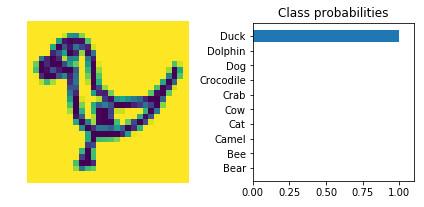

In [6]:
images, labels = next(iter(test_loader))

img = images[0].view(1, 3, 28, 28)

with torch.no_grad():
    probabilities = loaded_model(img)

ps = torch.softmax(probabilities, dim=1)
view_classification_result(img.view(1, 3, 28, 28), ps)